# import

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Load Files

<span style="color:red"><strong>MODIFICATION REQUIRED: Load your own dimension reduction result </strong></span>

In [4]:
# Load File
dim_result = pd.read_csv(Path('TCGA.HNSC.expression_log_tumor_MDS_2D.tsv'), sep = '\t', index_col=0).fillna("NaN")

In [5]:
dim_result

,MDS1,MDS2
sample_id,,
TCGA-4P-AA8J,-19.133892,132.003826
TCGA-BA-4074,-54.424333,224.582263
TCGA-BA-4075,199.379219,21.350112
TCGA-BA-4076,128.034909,-45.479773
TCGA-BA-4077,-42.312133,40.950412
...,...,...
TCGA-UF-A7JT,46.801803,89.082685
TCGA-UF-A7JV,30.442146,71.657260
TCGA-UP-A6WW,-34.431416,166.223001


# Clustering 

<span style="color:red"><strong>MODIFICATION REQUIRED: scale and process as needed </strong></span>


In [8]:
max_cluster = 10 # max attempted amount of clusters

# Scaling and processing
dim_scaled = StandardScaler().fit_transform(dim_result) # PCA - put all PCs on same scale
dim_scaled = pd.DataFrame(dim_scaled, 
                          index=dim_result.index, 
                          columns=dim_result.columns)
# dim_scaled = dim_result.copy() # use this if you don't need to further process your dim red result

# modify this to change the axis label in plots below
axis1 = "MDS1"
axis2 = "MDS2"
print(dim_scaled.head())

                  MDS1      MDS2
sample_id                       
TCGA-4P-AA8J -0.215869  1.482797
TCGA-BA-4074 -0.614016  2.522729
TCGA-BA-4075  2.249397  0.239825
TCGA-BA-4076  1.444490 -0.510874
TCGA-BA-4077 -0.477366  0.459995


C:\Users\HUIPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HUIPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HUIPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HUIPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

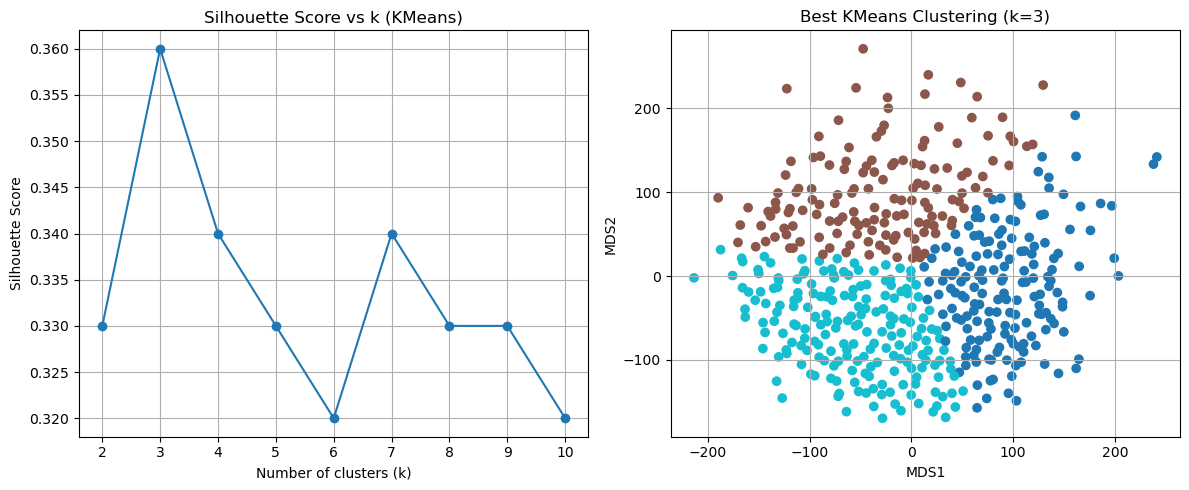

In [9]:
# kmeans
# siloutte score for best cluster dim selection
kmeans_score = []
for k in range(2, max_cluster+1):
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(dim_scaled)
    score = silhouette_score(dim_scaled, labels)
    kmeans_score.append(round(score, 2))
best_k_kmeans = range(2, max_cluster+1)[kmeans_score.index(max(kmeans_score))]
kmeans = KMeans(n_clusters=best_k_kmeans, random_state=2)
labels = kmeans.fit_predict(dim_scaled)
labels_df = pd.DataFrame({
    'sample_id': dim_result.index,
    'kmeans_cluster_label': labels
}).set_index('sample_id')

# plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# silhouette scores
axs[0].plot(range(2, max_cluster + 1), kmeans_score, marker='o')
axs[0].set_xticks(range(2, max_cluster + 1))
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Silhouette Score vs k (KMeans)')
axs[0].grid(True)
# best clustering result
axs[1].scatter(dim_result.iloc[:, 0], dim_result.iloc[:, 1], c=labels, cmap='tab10')
axs[1].set_title(f'Best KMeans Clustering (k={best_k_kmeans})')
axs[1].set_xlabel(axis1)
axs[1].set_ylabel(axis2)
axs[1].grid(True)
plt.tight_layout()
plt.show()

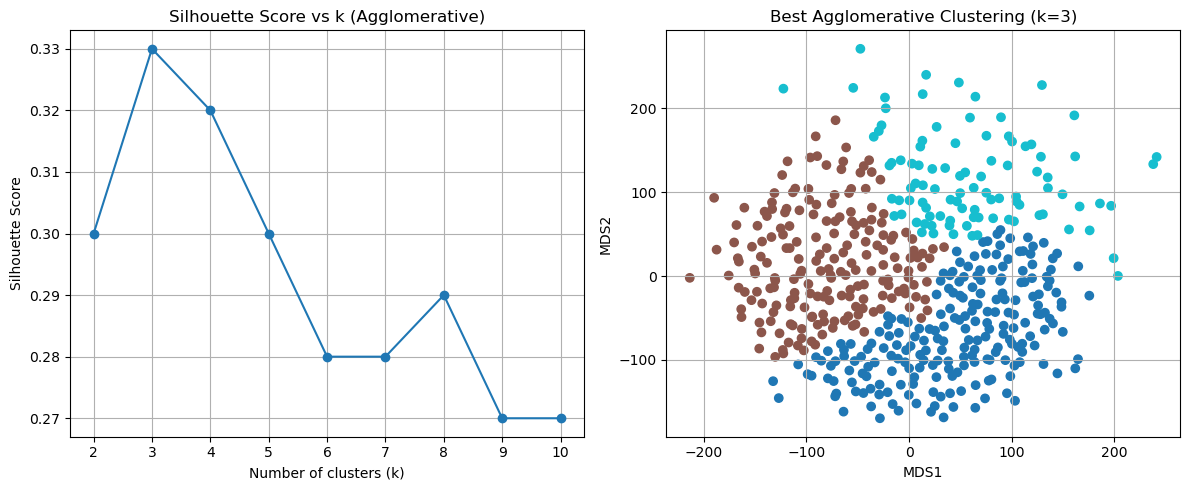

In [10]:
# agglomerative
agg_score = []
for k in range(2, max_cluster + 1):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(dim_scaled)
    score = silhouette_score(dim_scaled, labels)
    agg_score.append(round(score, 2))
best_k_agg = range(2, max_cluster + 1)[agg_score.index(max(agg_score))]
agg = AgglomerativeClustering(n_clusters=best_k_agg)
labels = agg.fit_predict(dim_scaled)
labels_df['agg_cluster_label'] = labels

# plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# silhouette scores
axs[0].plot(range(2, max_cluster + 1), agg_score, marker='o')
axs[0].set_xticks(range(2, max_cluster + 1))
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Silhouette Score vs k (Agglomerative)')
axs[0].grid(True)
# best clustering result
axs[1].scatter(dim_result.iloc[:, 0], dim_result.iloc[:, 1], c=labels, cmap='tab10')
axs[1].set_title(f'Best Agglomerative Clustering (k={best_k_agg})')
axs[1].set_xlabel(axis1)
axs[1].set_ylabel(axis2)
axs[1].grid(True)

plt.tight_layout()
plt.show()

C:\Users\HUIPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HUIPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HUIPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HUIPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

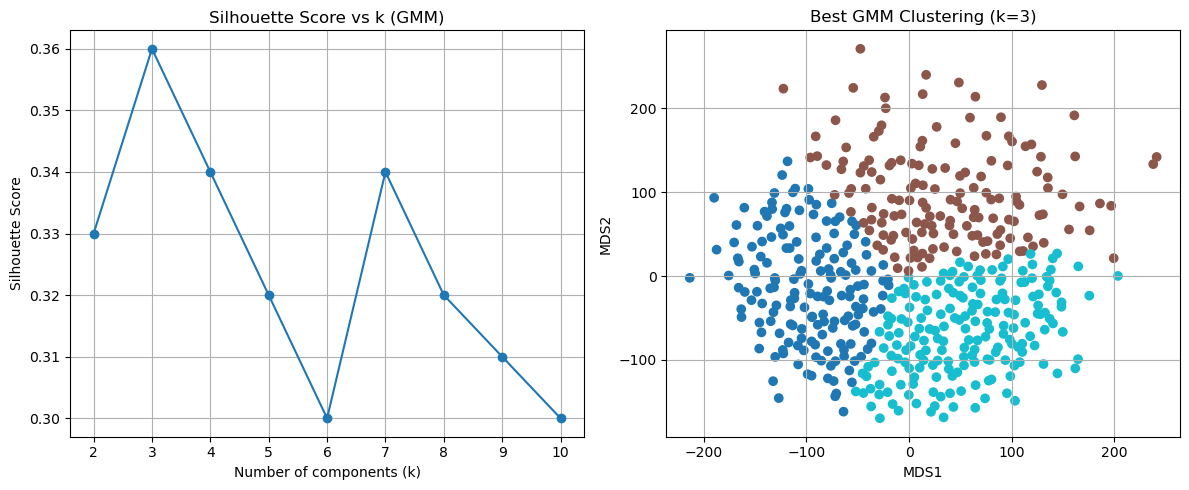

In [11]:
# GMM
gmm_score = []
for k in range(2, max_cluster + 1):
    gmm = GaussianMixture(n_components=k, random_state=1)
    labels = gmm.fit_predict(dim_scaled)
    score = silhouette_score(dim_scaled, labels)
    gmm_score.append(round(score, 2))
best_k_gmm = range(2, max_cluster + 1)[gmm_score.index(max(gmm_score))]
gmm = GaussianMixture(n_components=best_k_gmm, random_state=1)
labels = gmm.fit_predict(dim_scaled)
labels_df['gmm_cluster_label'] = labels

# plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# silhouette scores
axs[0].plot(range(2, max_cluster + 1), gmm_score, marker='o')
axs[0].set_xticks(range(2, max_cluster + 1))
axs[0].set_xlabel('Number of components (k)')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Silhouette Score vs k (GMM)')
axs[0].grid(True)
# best clustering
axs[1].scatter(dim_result.iloc[:, 0], dim_result.iloc[:, 1], c=labels, cmap='tab10')
axs[1].set_title(f'Best GMM Clustering (k={best_k_gmm})')
axs[1].set_xlabel(axis1)
axs[1].set_ylabel(axis2)
axs[1].grid(True)

plt.tight_layout()
plt.show()


C:\Users\HUIPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HUIPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HUIPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HUIPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

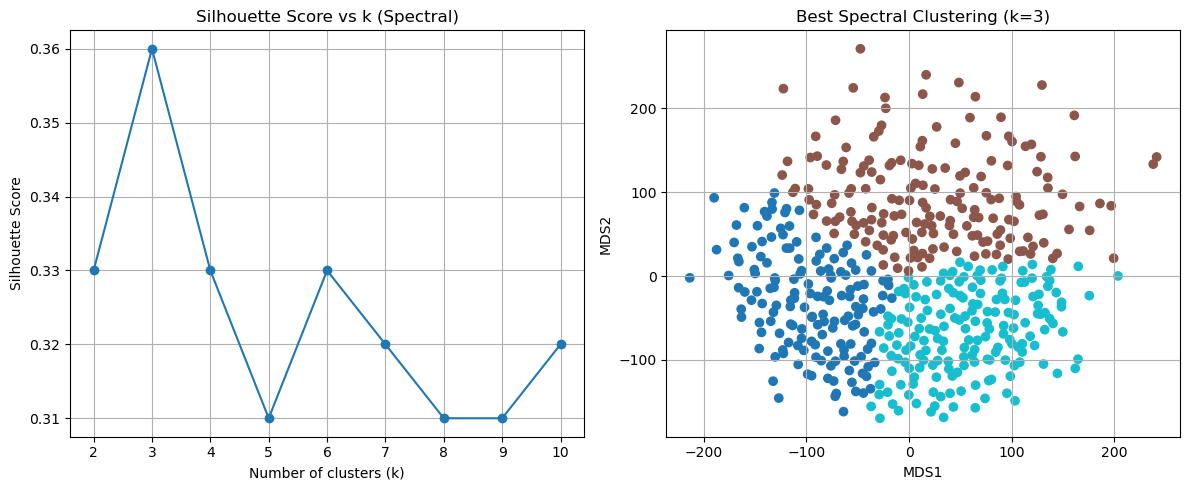

In [12]:
# Spectral Clustering
spectral_score = []
for k in range(2, max_cluster + 1):
    spectral = SpectralClustering(n_clusters=k, assign_labels='kmeans', random_state=1, affinity='nearest_neighbors')
    labels = spectral.fit_predict(dim_scaled)
    score = silhouette_score(dim_scaled, labels)
    spectral_score.append(round(score, 2))
best_k_spectral = range(2, max_cluster + 1)[spectral_score.index(max(spectral_score))]
spectral = SpectralClustering(n_clusters=best_k_spectral, assign_labels='kmeans', random_state=1, affinity='nearest_neighbors')
labels = spectral.fit_predict(dim_scaled)
labels_df['spectral_cluster_label'] = labels

# plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# silhouette scores
axs[0].plot(range(2, max_cluster + 1), spectral_score, marker='o')
axs[0].set_xticks(range(2, max_cluster + 1))
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Silhouette Score vs k (Spectral)')
axs[0].grid(True)
# best clustering
axs[1].scatter(dim_result.iloc[:, 0], dim_result.iloc[:, 1], c=labels, cmap='tab10')
axs[1].set_title(f'Best Spectral Clustering (k={best_k_spectral})')
axs[1].set_xlabel(axis1)
axs[1].set_ylabel(axis2)
axs[1].grid(True)

plt.tight_layout()
plt.show()


<span style="color:red"><strong>MODIFICATION REQUIRED: identify range of eps to optimize </strong></span>

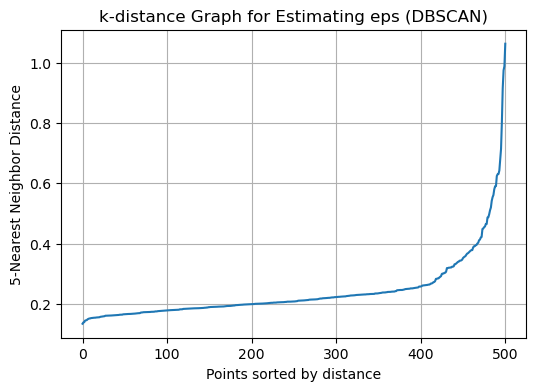

In [14]:
# Set k = min_samples for DBSCAN
k = 5

# Fit nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(dim_scaled)
distances, indices = nbrs.kneighbors(dim_scaled)

# Use the k-th nearest neighbor distance (last column), excluding the self-distance
k_distances = np.sort(distances[:, -1])

# Plot the sorted distances
plt.figure(figsize=(6, 4))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-Nearest Neighbor Distance')
plt.title('k-distance Graph for Estimating eps (DBSCAN)')
plt.grid(True)
plt.show()

<span style="color:red"><strong>MODIFICATION REQUIRED: change lower_eps and upper_eps as indicated by graph above </strong></span>

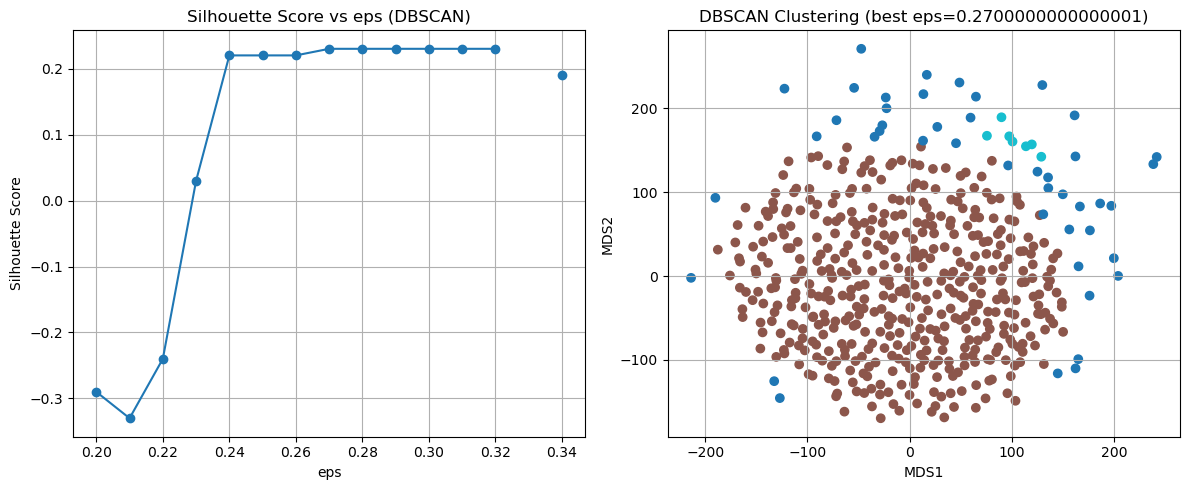

In [34]:
lower_eps = 0.2
upper_eps = 0.6
step=0.01
eps_values = list(np.arange(lower_eps, upper_eps + step, step))
dbscan_scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(dim_scaled)
    # Count valid clusters
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters >= 2:
        score = round(silhouette_score(dim_scaled, labels), 2)
        dbscan_scores.append(score)
    else:
        dbscan_scores.append(np.nan)  # invalid
# Select best eps
valid_scores = [(eps, score) for eps, score in zip(eps_values, dbscan_scores) if not np.isnan(score)]
if valid_scores:
    best_eps, best_score = max(valid_scores, key=lambda x: x[1])
    best_model = DBSCAN(eps=best_eps, min_samples=5)
    best_labels = best_model.fit_predict(dim_scaled)
else:
    best_eps, best_score, best_labels = None, None, None
labels_df['dbscan_cluster_label'] = best_labels

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# silhouette vs eps
axs[0].plot(eps_values, dbscan_scores, marker='o')
axs[0].set_xlabel('eps')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_title('Silhouette Score vs eps (DBSCAN)')
axs[0].grid(True)
# Plot clustering
if best_labels is not None:
    axs[1].scatter(dim_result.iloc[:, 0], dim_result.iloc[:, 1], c=best_labels, cmap='tab10')
    axs[1].set_title(f'DBSCAN Clustering (best eps={best_eps})')
else:
    axs[1].text(0.5, 0.5, "No valid clustering", ha='center', va='center')
axs[1].set_xlabel(axis1)
axs[1].set_ylabel(axis2)
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Summary

In [36]:
best_scores = {
    'KMeans': max(kmeans_score),
    'Agglomerative': max(agg_score),
    'GMM': max(gmm_score),
    'Spectral': max(spectral_score),
    'DBSCAN': best_score  # assuming you already defined best_score
}
summary_df = pd.DataFrame([best_scores], index=['highest_silhouette'])
best_method = summary_df.loc['highest_silhouette'].idxmax()
print(f"Best method by silhouette score: {best_method}")
summary_df

Best method by silhouette score: KMeans


,KMeans,Agglomerative,GMM,Spectral,DBSCAN
highest_silhouette,0.36,0.33,0.36,0.36,0.23


In [37]:
labels_df

,kmeans_cluster_label,agg_cluster_label,gmm_cluster_label,spectral_cluster_label,dbscan_cluster_label
sample_id,,,,,
TCGA-4P-AA8J,1,2,1,1,0
TCGA-BA-4074,1,2,1,1,-1
TCGA-BA-4075,0,2,1,1,-1
TCGA-BA-4076,0,0,2,2,0
TCGA-BA-4077,1,1,0,1,0
...,...,...,...,...,...
TCGA-UF-A7JT,1,2,1,1,0
TCGA-UF-A7JV,1,2,1,1,0
TCGA-UP-A6WW,1,2,1,1,-1


In [38]:
summary_df.to_csv("PCA_clustering_result_df.tsv", sep="\t", index=True)
labels_df.to_csv("PCA_clustering_labels_df.tsv", sep="\t", index=True)